In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

In [3]:
# set up time array
time_length = 120 # seconds
dt = 0.0001 # seconds

#set up object momoments of inertia
I1, I2, I3 = 0.12, 0.06, 0.03 # kg m^2
I = np.diag([I1, I2, I3])

In [4]:
def simulate(omega0):
    n_steps = int(time_length/dt)
    omega = omega0
    intermediate_omega = np.zeros(n_steps)
    
    for i in range(n_steps):
        # Calculate the angular acceleration at the current time step
        omega_dot = np.zeros(3)
        omega_dot[0] = (I2 - I3) * omega[1] * omega[2] / I1
        omega_dot[1] = (I3 - I1) * omega[0] * omega[2] / I2
        omega_dot[2] = (I1 - I2) * omega[0] * omega[1] / I3
        
        # Save the current value of omega[1]
        intermediate_omega[i] = omega[1]
        
        # Update the angular velocities
        omega = omega + omega_dot * dt

    return intermediate_omega


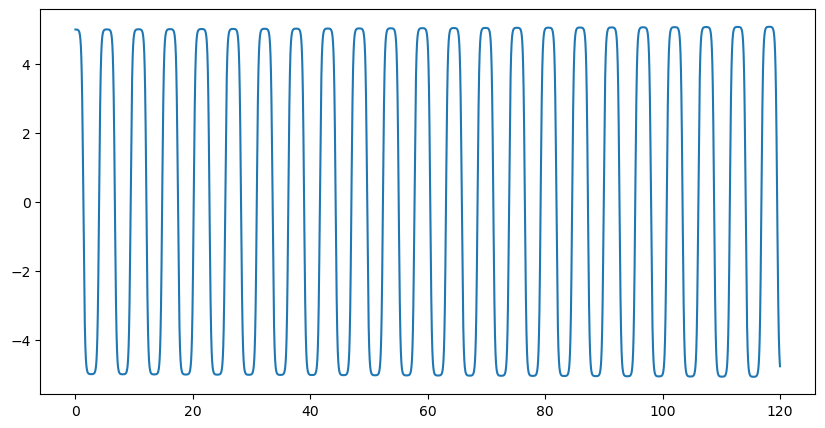

In [5]:
# test simulate function
omega0 = [0, 5, 0.2]
intermediate_omega = simulate(omega0)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, time_length, dt), intermediate_omega)

In [6]:
def get_freq(intermediate_omega):
    N = len(intermediate_omega)
    yf = fft(intermediate_omega)
    T = dt
    xf = fftfreq(N, T)[:N//2]   # positive frequencies
    magnitudes = abs(yf[:N//2]) # magnitude spectrum

    # identify dominant frequency
    dom_i = np.argmax(magnitudes)
    dom_freq = xf[dom_i]
    dom_mag = magnitudes[dom_i]

    # calculate peak-to-noise ratio
    noise_mag = np.delete(magnitudes, dom_i)
    noise_level = np.mean(noise_mag)
    peak_to_noise_ratio = dom_mag / noise_level if noise_level != 0 else np.inf
    period = 1 / dom_freq if dom_freq != 0 else np.inf

    return dom_freq, period, peak_to_noise_ratio

print(get_freq(intermediate_omega))

(0.18333333333333332, 5.454545454545455, 64685.779763338614)


omega_i0: 5.0, dominant frequency: 0.23333333333333334, period: 4.285714285714286, peak-to-noise ratio: 245531.2115732775
omega_i0: 5.526315789473684, dominant frequency: 0.25, period: 4.0, peak-to-noise ratio: 73036.43853288493
omega_i0: 6.052631578947368, dominant frequency: 0.26666666666666666, period: 3.75, peak-to-noise ratio: 55065.78752358747
omega_i0: 6.578947368421053, dominant frequency: 0.2916666666666667, period: 3.4285714285714284, peak-to-noise ratio: 44997.127625685964
omega_i0: 7.105263157894736, dominant frequency: 0.30833333333333335, period: 3.243243243243243, peak-to-noise ratio: 50855.11754743252
omega_i0: 7.631578947368421, dominant frequency: 0.325, period: 3.0769230769230766, peak-to-noise ratio: 55081.2806107681
omega_i0: 8.157894736842106, dominant frequency: 0.3416666666666667, period: 2.926829268292683, peak-to-noise ratio: 56563.03843177724
omega_i0: 8.68421052631579, dominant frequency: 0.35833333333333334, period: 2.7906976744186047, peak-to-noise ratio: 

Text(0, 0.5, 'Dominant frequency (Hz)')

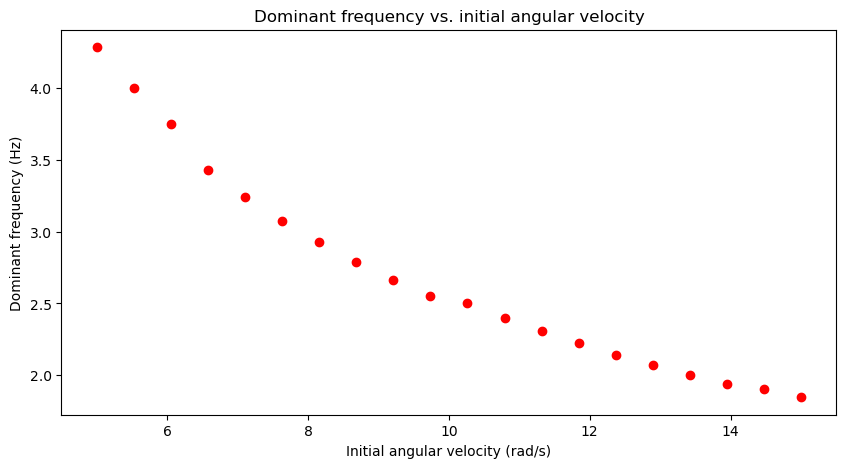

In [ ]:
omega_i0s = np.linspace(5, 15, 20)
plt.figure(figsize=(10, 5))
for omega_i0 in omega_i0s:
    omega0 = [0.2, omega_i0, 0.2]
    intermediate_omega = simulate(omega0)
    dom_freq, period, peak_to_noise_ratio = get_freq(intermediate_omega)
    plt.scatter(omega_i0, period, c='r')
    print(f'omega_i0: {omega_i0}, dominant frequency: {dom_freq}, period: {period}, peak-to-noise ratio: {peak_to_noise_ratio}')

plt.xlabel('Initial angular velocity about intermediate axis (rad/s)')
plt.ylabel('Period (s)')
plt.title('Period vs Initial angular velocity about intermediate axis')
plt.show()

omega_p0: 0.2, dominant frequency: 0.23333333333333334, period: 4.285714285714286, peak-to-noise ratio: 245531.2115732775
omega_p0: 0.45263157894736844, dominant frequency: 0.30833333333333335, period: 3.243243243243243, peak-to-noise ratio: 199828.98376705305
omega_p0: 0.7052631578947368, dominant frequency: 0.36666666666666664, period: 2.7272727272727275, peak-to-noise ratio: 828677.6429333488
omega_p0: 0.9578947368421054, dominant frequency: 0.425, period: 2.3529411764705883, peak-to-noise ratio: 166024.76901320534
omega_p0: 1.2105263157894737, dominant frequency: 0.48333333333333334, period: 2.0689655172413794, peak-to-noise ratio: 60342.002675130556
omega_p0: 1.463157894736842, dominant frequency: 0.5416666666666666, period: 1.8461538461538463, peak-to-noise ratio: 48609.12218685486
omega_p0: 1.7157894736842105, dominant frequency: 0.6, period: 1.6666666666666667, peak-to-noise ratio: 55403.89416735872
omega_p0: 1.968421052631579, dominant frequency: 0.6583333333333333, period: 1.

Text(0, 0.5, 'Dominant frequency (Hz)')

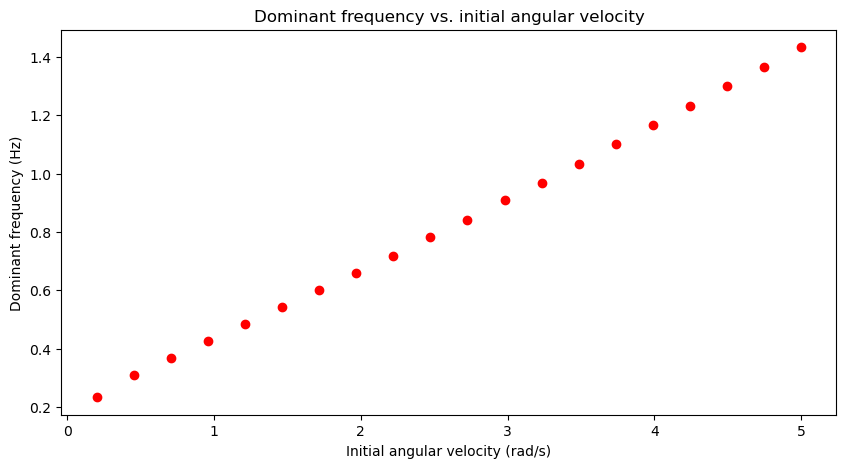

In [8]:
omega_p0s = np.linspace(0.2, 5, 20)
plt.figure(figsize=(10, 5))
for omega_p0 in omega_p0s:
    omega0 = [omega_p0, 5, 0.2]
    intermediate_omega = simulate(omega0)
    dom_freq, period, peak_to_noise_ratio = get_freq(intermediate_omega)
    plt.scatter(omega_p0, dom_freq, c='r')
    print(f'omega_p0: {omega_p0}, dominant frequency: {dom_freq}, period: {period}, peak-to-noise ratio: {peak_to_noise_ratio}')

plt.title('Dominant frequency vs. initial angular velocity')
plt.xlabel('Initial angular velocity (rad/s)')
plt.ylabel('Dominant frequency (Hz)')
